## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../Project/Data/raw_data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 01. Exploring Data (row, column, dtypes):

How many rows and columns does the data have?

In [4]:
print(f'The number of rows : {df.shape[0]}')
print(f'The number of columns : {df.shape[1]}')

The number of rows : 48895
The number of columns : 16


What is the meaning of each row?
- Each row is the infomation of each listing

Are there any duplicate rows?

In [5]:
print(df.duplicated().sum())

0


What is the meaning of each column?


| Column name     | Meaning |
| :---        |    :----   |
| id      | ID of the listing      |
| name   | The name of the listing        |
| host_id      | ID of the host      |
| host_name   | Name of the host        |
| neighbourhood_group      | The group of neighbourhood area around the listing       |
| neighbourhood   | The neighbourhood area around the listing          |
| latitude      | The latitude of place of listing (from the World Geodetic System(WGS84))       |
| longitude   |  The longtitude of place of listing (from the World Geodetic System(WGS84))       |
| room_type   | The type of room        |
| price      | The price of listing      |
| minimum_nights      | The minimum nights to order        |
| number_of_reviews   | The number of reviews for this listing        |
| last_review      | The date of latest reviews for this listing       |
| reviews_per_month   | The average number of reviews for this listing per month    |
| calculated_host_listings_count   | The number of listings the host has in the curent scrape       |
| availability_365   | The availability of the listing 365 days in the future as determined by the calendar       |


What is the current data type of each column? Are there any columns with inappropriate data types?

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

To gain a better understanding of columns with the 'object' data type, we will break them down into individual subtypes

In [7]:
def open_object_col(col):
    return (set(col.apply(type)))

In [8]:
df.apply(open_object_col)

id                                                 {<class 'int'>}
name                              {<class 'float'>, <class 'str'>}
host_id                                            {<class 'int'>}
host_name                         {<class 'float'>, <class 'str'>}
neighbourhood_group                                {<class 'str'>}
neighbourhood                                      {<class 'str'>}
latitude                                         {<class 'float'>}
longitude                                        {<class 'float'>}
room_type                                          {<class 'str'>}
price                                              {<class 'int'>}
minimum_nights                                     {<class 'int'>}
number_of_reviews                                  {<class 'int'>}
last_review                       {<class 'float'>, <class 'str'>}
reviews_per_month                                {<class 'float'>}
calculated_host_listings_count                     {<class 'in

Columns with appropriate and inappropriate data types:

- Column id, host_id, neighbourhood_group, neighbourhood, latitude,longtitude, room_type, price, minimum_nights, number_of_reviews,review_per_month, calculated_host_listings_count and availability_365 have a right data type.
- Column name, host_name need to convert into string
- Column last_review need to convert into datetime

## 02. Pre-processing Data:


Convert to the appropriate data type:

In [9]:
df[['name', 'host_name']] = df[['name', 'host_name']].replace(to_replace=np.nan, value='')
df['last_review'] = pd.to_datetime(df['last_review'],format='%Y-%m-%d')

In [10]:
df.apply(open_object_col)

id                                                                  {<class 'int'>}
name                                                                {<class 'str'>}
host_id                                                             {<class 'int'>}
host_name                                                           {<class 'str'>}
neighbourhood_group                                                 {<class 'str'>}
neighbourhood                                                       {<class 'str'>}
latitude                                                          {<class 'float'>}
longitude                                                         {<class 'float'>}
room_type                                                           {<class 'str'>}
price                                                               {<class 'int'>}
minimum_nights                                                      {<class 'int'>}
number_of_reviews                                                   {<class 

Handle missing value

Save to CSV file


## 03. Exploring Data (phân bổ dữ liệu):

### Numerical data

In [11]:
numerical_col = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','last_review']

In [12]:
df[numerical_col].describe()[2:7]

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review
min,0.0,1.0,0.0,0.01,1.0,0.0,2011-03-28 00:00:00
25%,69.0,1.0,1.0,0.19,1.0,0.0,2018-07-08 00:00:00
50%,106.0,3.0,5.0,0.72,1.0,45.0,2019-05-19 00:00:00
75%,175.0,5.0,24.0,2.02,2.0,227.0,2019-06-23 00:00:00
max,10000.0,1250.0,629.0,58.50,327.0,365.0,2019-07-08 00:00:00


Analyze price

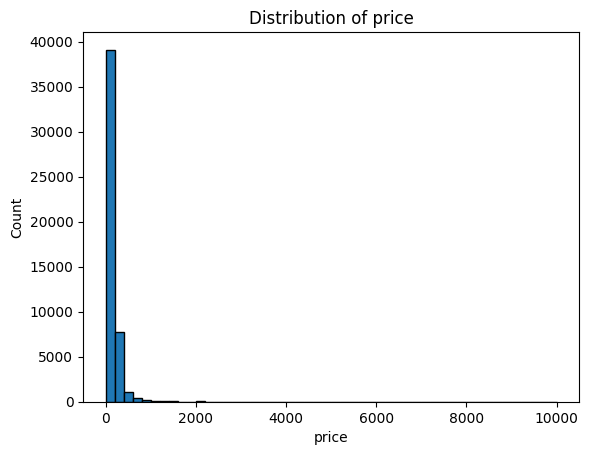

In [13]:
plt.hist(df['price'],bins=50,edgecolor='black')
plt.xlabel('price')
plt.ylabel('Count')
plt.title('Distribution of price')
plt.show()

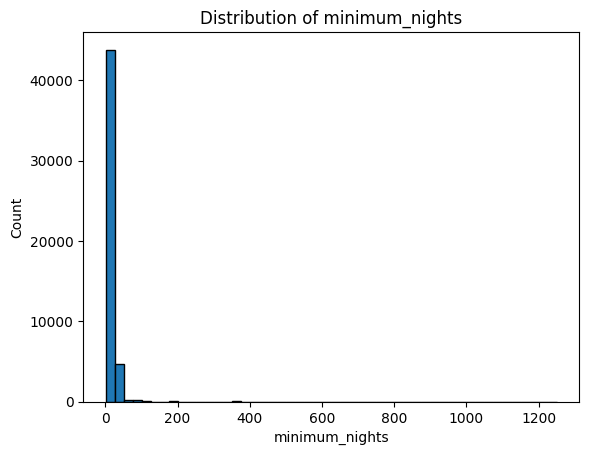

In [14]:
plt.hist(df['minimum_nights'],bins=50,edgecolor='black')
plt.xlabel('minimum_nights')
plt.ylabel('Count')
plt.title('Distribution of minimum_nights')
plt.show()

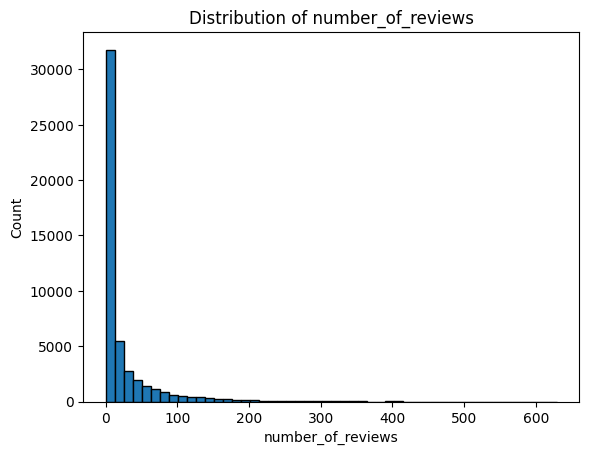

In [15]:
plt.hist(df['number_of_reviews'],bins=50,edgecolor='black')
plt.xlabel('number_of_reviews')
plt.ylabel('Count')
plt.title('Distribution of number_of_reviews')
plt.show()

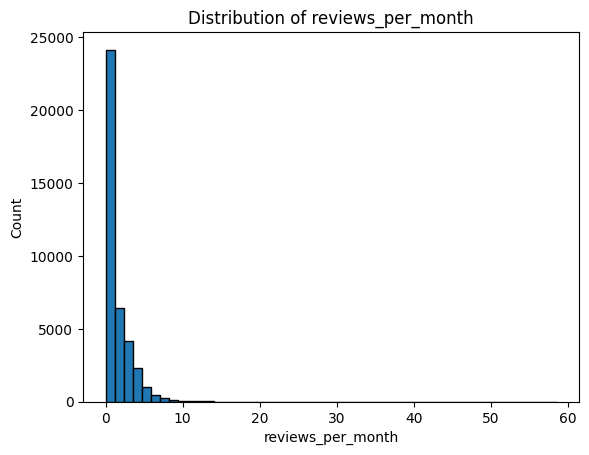

In [16]:
plt.hist(df['reviews_per_month'],bins=50,edgecolor='black')
plt.xlabel('reviews_per_month')
plt.ylabel('Count')
plt.title('Distribution of reviews_per_month')
plt.show()

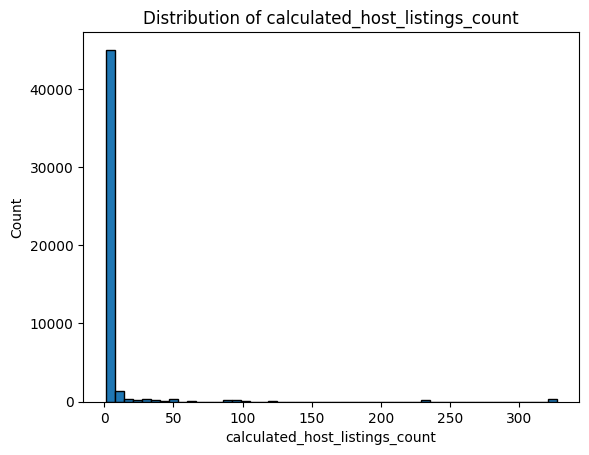

In [17]:
plt.hist(df['calculated_host_listings_count'],bins=50,edgecolor='black')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Count')
plt.title('Distribution of calculated_host_listings_count')
plt.show()

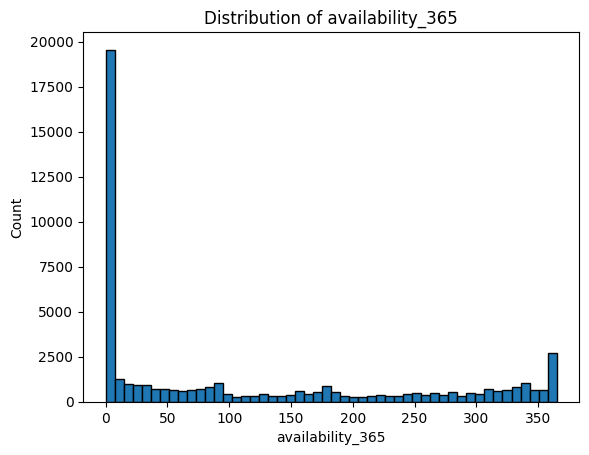

In [18]:
plt.hist(df['availability_365'],bins=50,edgecolor='black')
plt.xlabel('availability_365')
plt.ylabel('Count')
plt.title('Distribution of availability_365')
plt.show()

### Categorical data

In [19]:
df.select_dtypes(include='object').columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')

In [20]:
cate_col = ['neighbourhood_group', 'neighbourhood','room_type']

#### Analyzing neighbourhood_group


In [21]:
neighbourhood_group_df = df['neighbourhood_group']
neighbourhood_group_df.to_frame()

,neighbourhood_group
0,Brooklyn
1,Manhattan
2,Manhattan
3,Brooklyn
4,Manhattan
...,...
48890,Brooklyn
48891,Brooklyn
48892,Manhattan
48893,Manhattan


In [22]:
neighbourhood_group_count = neighbourhood_group_df.value_counts()
neighbourhood_group_count

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

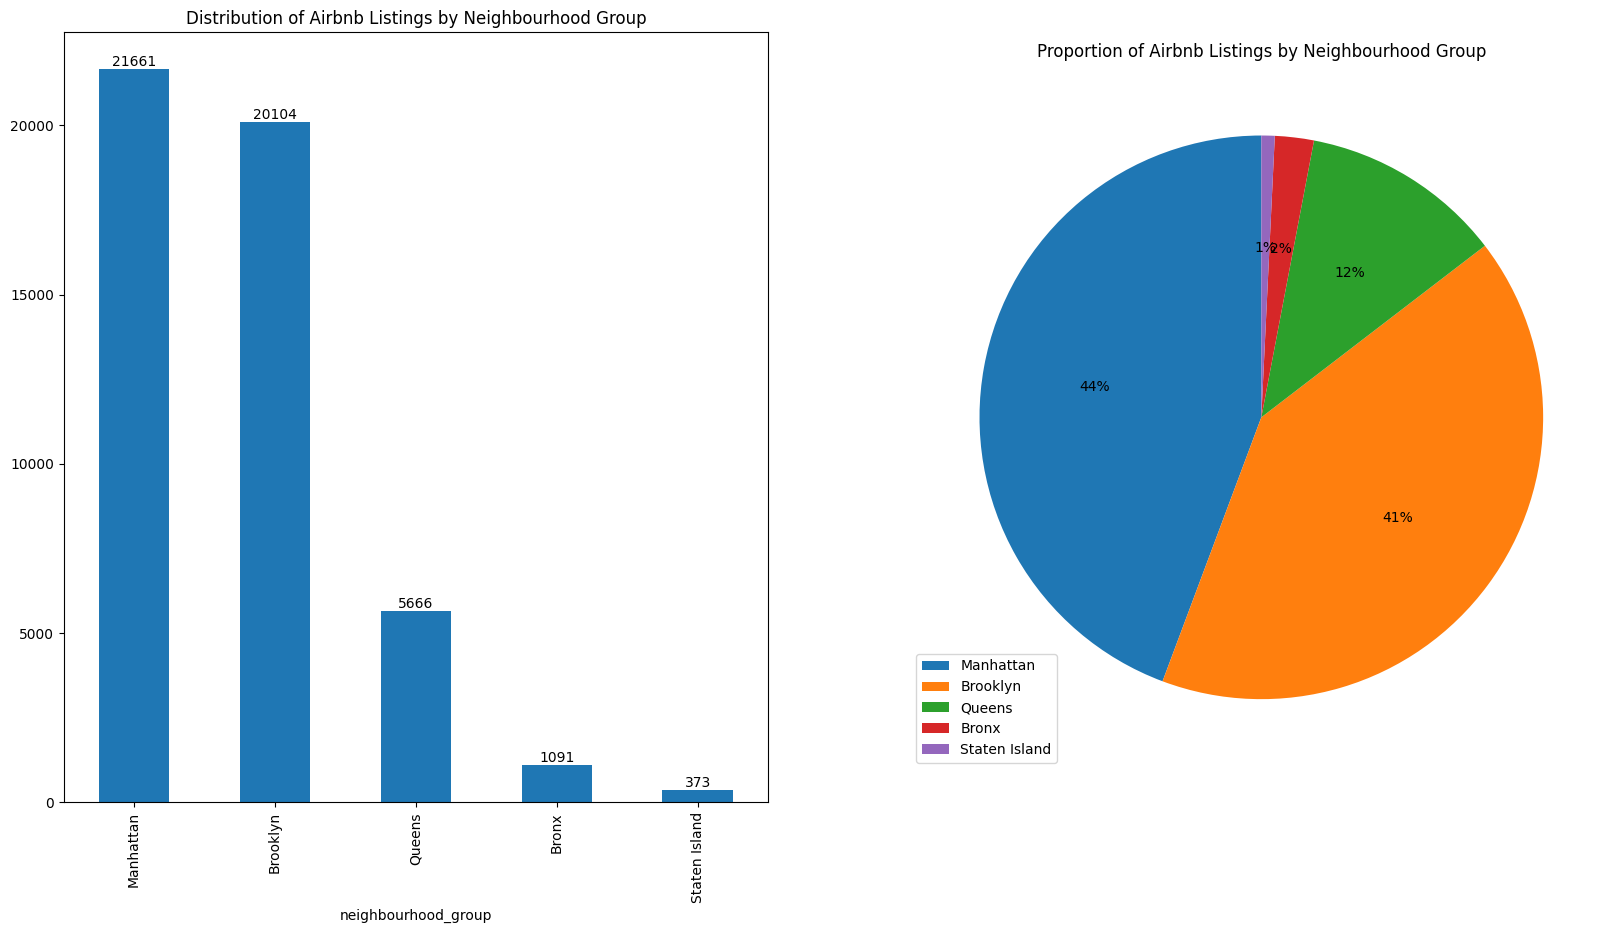

In [57]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
neighbourhood_group_count.plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Distribution of Airbnb Listings by Neighbourhood Group')

neighbourhood_group_count.plot(kind='pie', ax=ax[1], autopct='%1.f%%', startangle=90, labels=None)
ax[1].legend(labels=neighbourhood_group_count.index, loc=3)
ax[1].set_ylabel(None)
ax[1].set_title('Proportion of Airbnb Listings by Neighbourhood Group')
plt.show()

- It can be seen that there are a total of 5 neighborhood groups.
- Among them, Manhattan has the highest proportion (44% of the total Airbnb listings), followed by Brooklyn (41%), finally Queens (12%), Bronx (2%), and Staten Island (1%).
- It is evident that Airbnb listings in New York City are predominantly concentrated in two areas: Manhattan and Brooklyn.

#### Analyzing neighbourhood


In [24]:
neighbourhood_df = df['neighbourhood']
neighbourhood_df.to_frame()

,neighbourhood
0,Kensington
1,Midtown
2,Harlem
3,Clinton Hill
4,East Harlem
...,...
48890,Bedford-Stuyvesant
48891,Bushwick
48892,Harlem
48893,Hell's Kitchen


In [53]:
neighbourhood_count = neighbourhood_df.value_counts()
neighbourhood_count

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [54]:
neighbourhood_count.describe()

count     221.000000
mean      221.244344
std       536.160961
min         1.000000
25%        10.000000
50%        32.000000
75%       154.000000
max      3920.000000
Name: count, dtype: float64

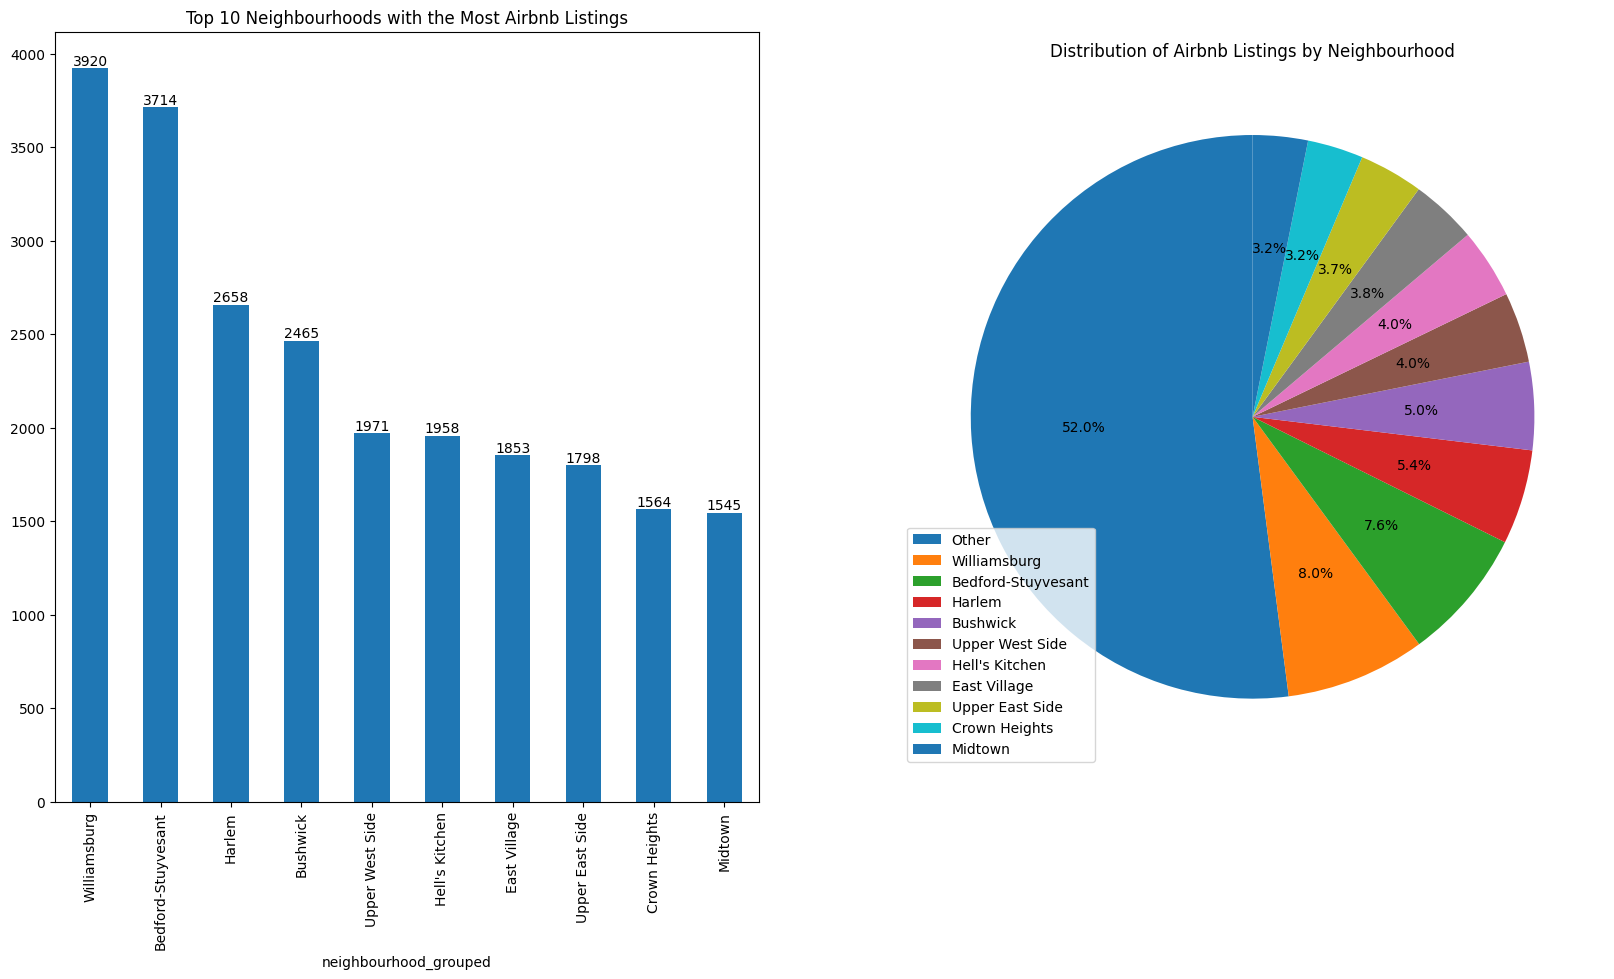

In [50]:
top_neighbourhoods = neighbourhood_df.value_counts().nlargest(10).index.tolist()

df['neighbourhood_grouped'] = df['neighbourhood'].apply(lambda x: x if x in top_neighbourhoods else 'Other')

grouped_neighbourhood_count = df['neighbourhood_grouped'].value_counts()
grouped_neighbourhood_count
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

grouped_neighbourhood_count[1:].plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Top 10 Neighbourhoods with the Most Airbnb Listings')

grouped_neighbourhood_count.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=90, labels= None)
ax[1].legend(grouped_neighbourhood_count.index, loc=3)
ax[1].set_ylabel(None)
ax[1].set_title('Distribution of Airbnb Listings by Neighbourhood')

plt.show()

- It can be observed that there are 221 different values for neighborhoods.
- Among them, the neighborhood with the highest number of Airbnb listings is Williamsburg, with 3920 listings (constituting 8%). This area appears to have a relatively high number of listings, as the data indicates that 75% of neighborhoods have fewer than 155 Airbnb listings.

#### Analyzing room_type

In [27]:
room_type_df = df['room_type']
room_type_df.to_frame()

,room_type
0,Private room
1,Entire home/apt
2,Private room
3,Entire home/apt
4,Entire home/apt
...,...
48890,Private room
48891,Private room
48892,Entire home/apt
48893,Shared room


In [28]:
room_type_count = room_type_df.value_counts()
room_type_count

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

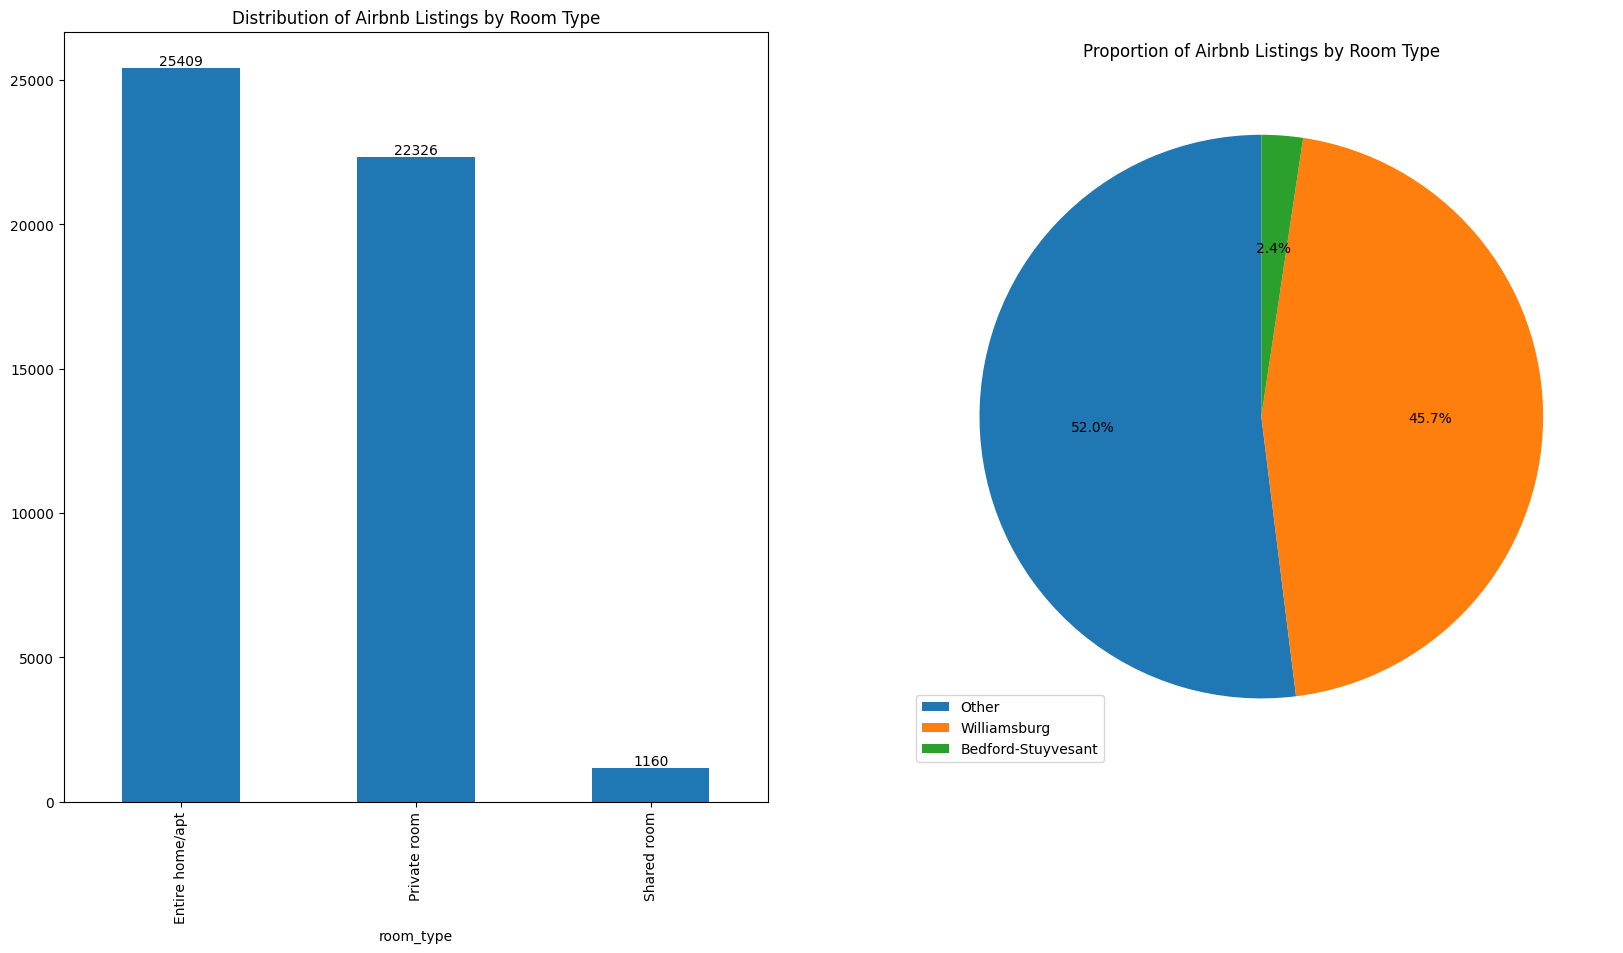

In [58]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
room_type_count.plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Distribution of Airbnb Listings by Room Type')

room_type_count.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=90, labels= None)
ax[1].legend(grouped_neighbourhood_count.index, loc=3)
ax[1].set_ylabel(None)
ax[1].set_title('Proportion of Airbnb Listings by Room Type')
plt.show()

- As observed, Airbnb listings in New York City fall into three room types: Entire home/apt, Private room, and Shared room.
- Among these, Entire home/apt is the most prevalent type (comprising 52% of the total with 25409 listings), followed by Private room (constituting 45.7% with 22326 listings), and lastly Shared room (making up 2.4% with 1160 listings).
- It can be noted that the Shared room category is relatively less common among Airbnb listings in New York City.